# Problem Statement
Does travel affect performance  of a team? 

In [51]:
# imports 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from ydata_profiling import ProfileReport

In [52]:
pd.set_option('display.max_columns', None)

In [53]:
# File path for csv File
filepath = "./../data/raw/datathon_2024_dataset.csv"
astro_df = pd.read_csv(filepath, index_col=0)

In [54]:
astro_df.head()

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0
1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,48,3,2,0,1,28,5,8,1,44,5,0,0,0,24,9,6,0
2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1
3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,OH,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0
4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1


In [55]:
astro_df.shape

(56775, 28)

### Missing Data

In [56]:
# check for missing data
astro_df.isna().sum()

game_date      0
home_team      0
away_team      0
is_day_game    0
home_score     0
away_score     0
venue          0
venue_name     0
city           0
state          0
home_pa        0
home_1b        0
home_2b        0
home_3b        0
home_hr        0
home_fo        0
home_so        0
home_bb        0
home_hbp       0
away_pa        0
away_1b        0
away_2b        0
away_3b        0
away_hr        0
away_fo        0
away_so        0
away_bb        0
away_hbp       0
dtype: int64

In [57]:
# Remove duplicates if any
astro_df.drop_duplicates().shape

(56775, 28)

In [58]:
# Numeric columns
numeric = astro_df.select_dtypes(include=["int64", "float64"])
numeric

,game_date,home_score,away_score,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
0,20000329,3,5,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0
1,20000330,1,5,48,3,2,0,1,28,5,8,1,44,5,0,0,0,24,9,6,0
2,20000403,2,0,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1
3,20000403,3,3,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0
4,20000403,6,4,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,20231001,1,2,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1
56771,20231001,5,2,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0
56772,20231001,5,2,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0
56773,20231001,1,0,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1


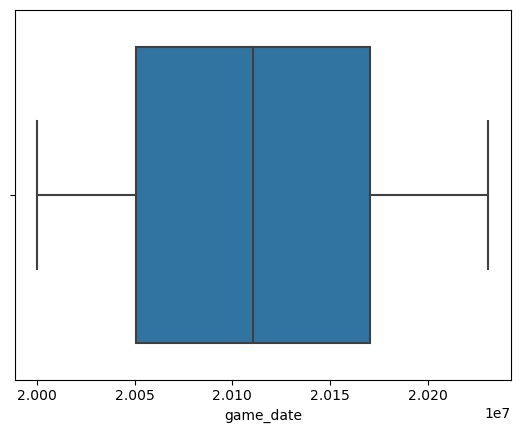

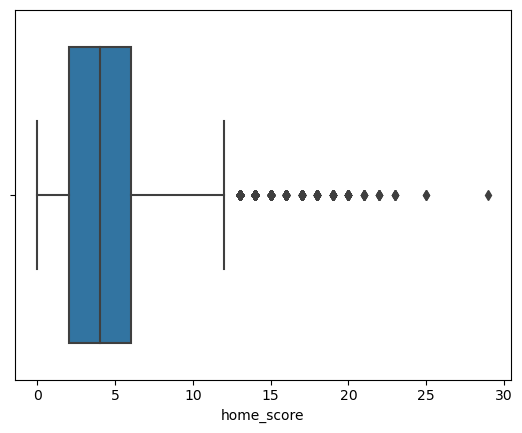

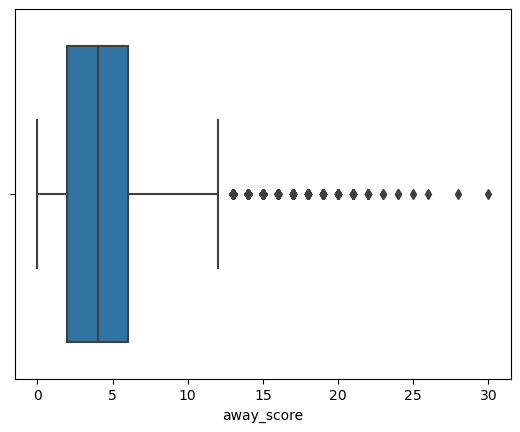

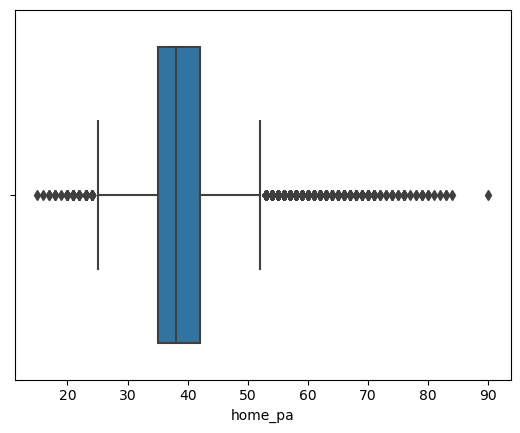

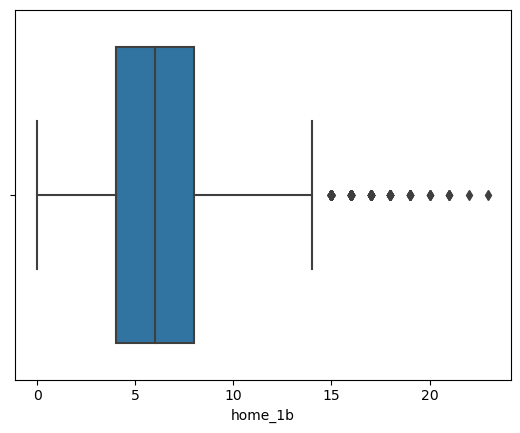

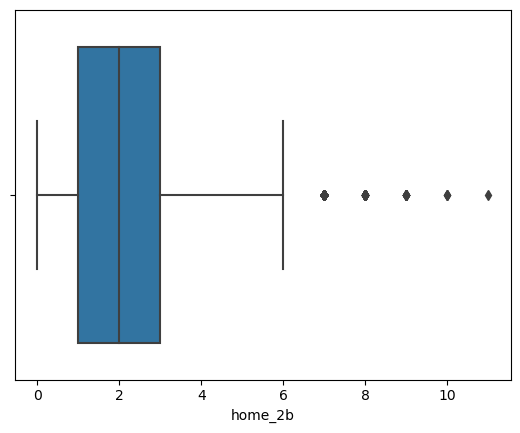

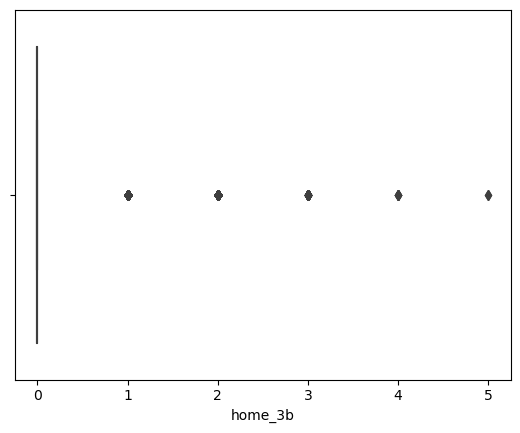

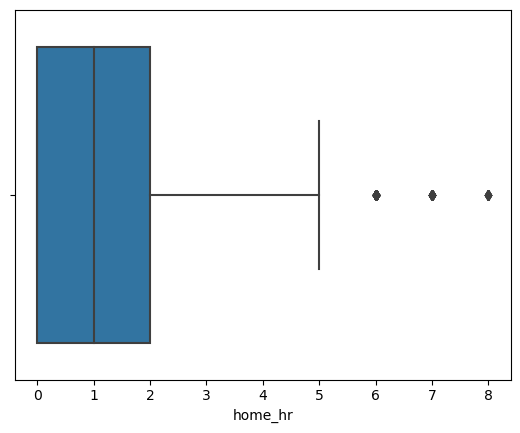

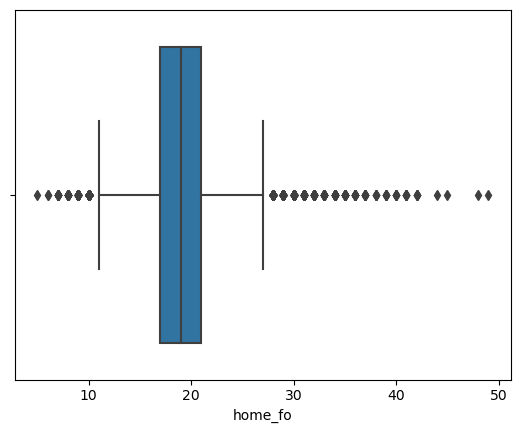

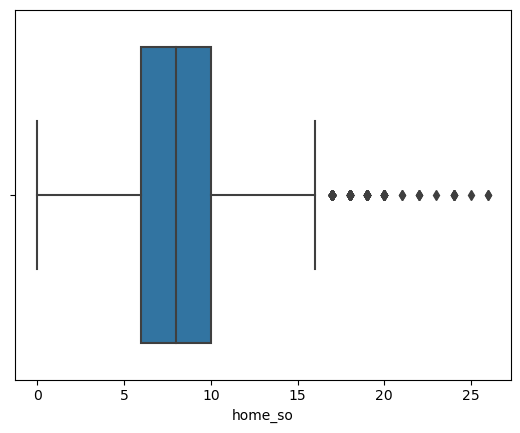

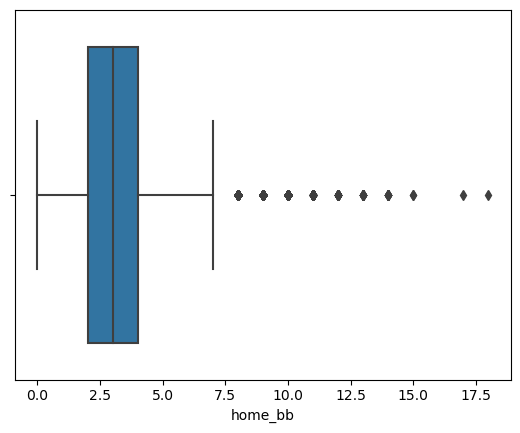

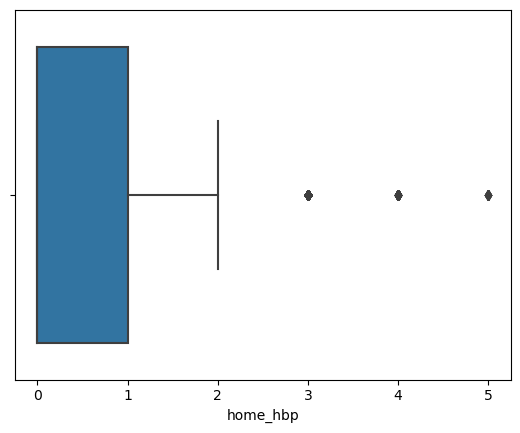

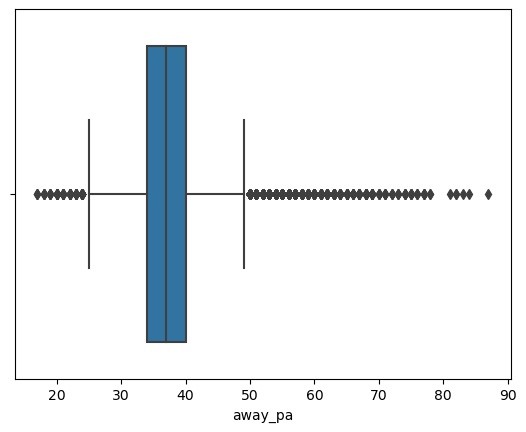

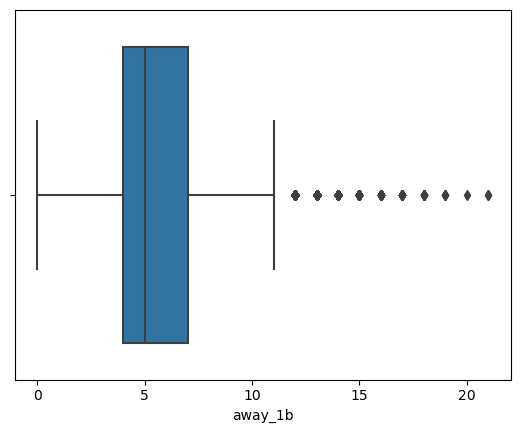

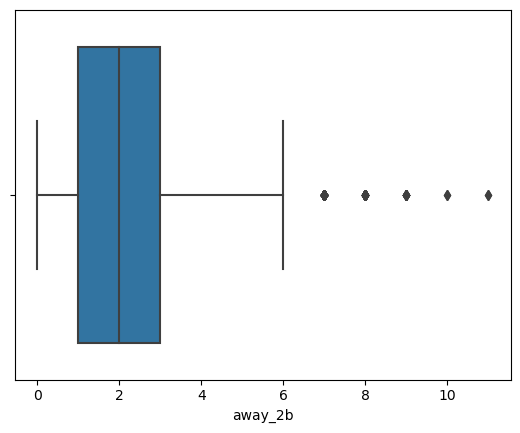

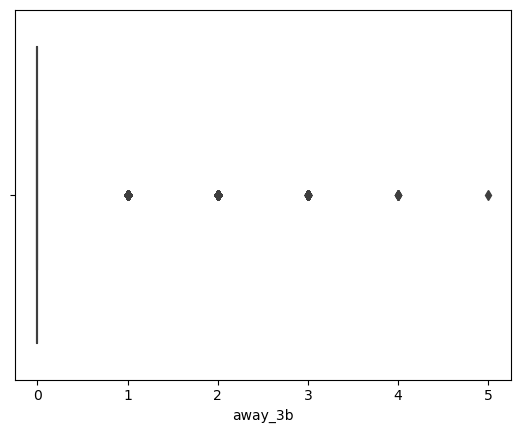

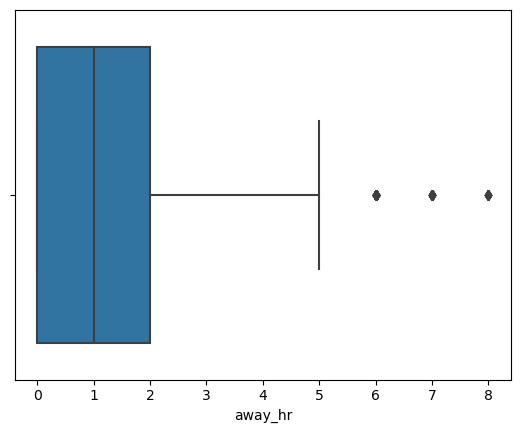

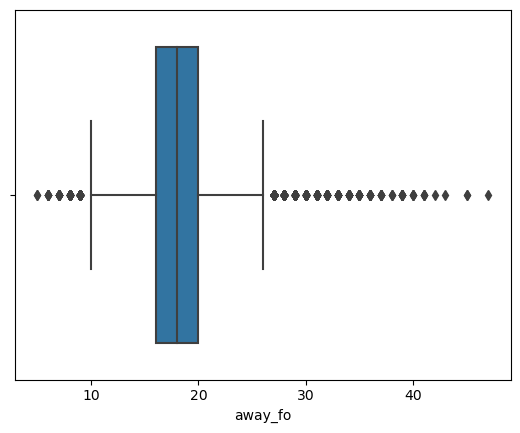

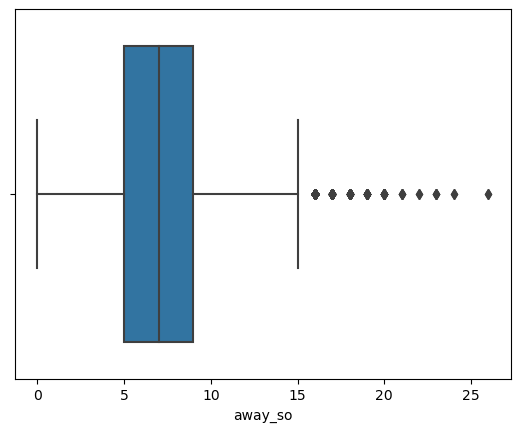

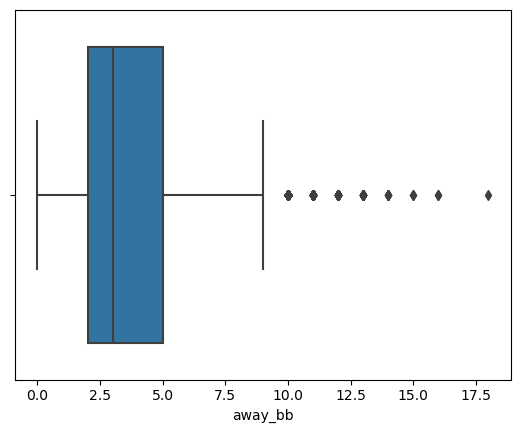

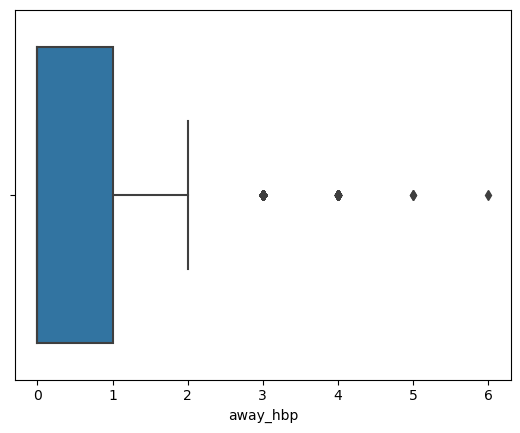

In [59]:
for i in numeric.columns:
    sns.boxplot(x=numeric[i], )
    plt.show()

In [60]:
for i in numeric.columns:
    # Get 25th and 75th percentile
    q25, q75 = np.percentile(numeric[i], 25), np.percentile(numeric[i], 75)

    # Get IQR 
    iqr = q75 - q25

    # Get cutofff
    cutoff = iqr * 1.5

    # threshold
    lower, upper = q25 - cutoff, q75 + cutoff

    # outliers 
    removed_outliers = [x for x in numeric[i] if x >= lower and x <= upper]
    
    

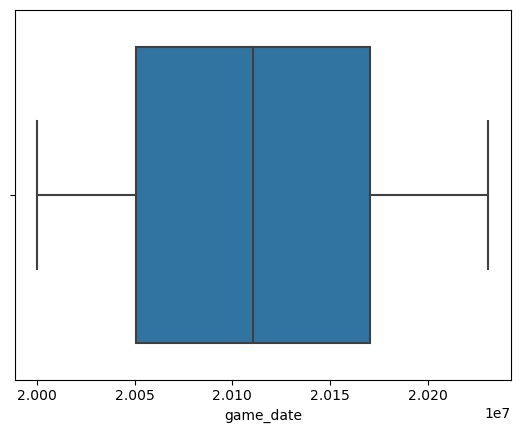

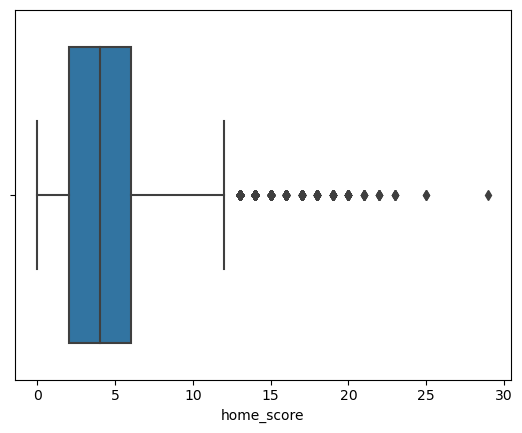

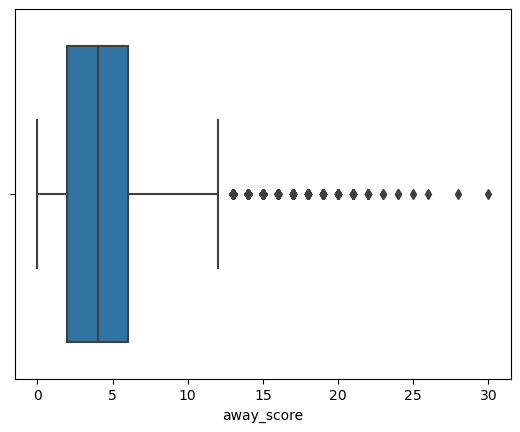

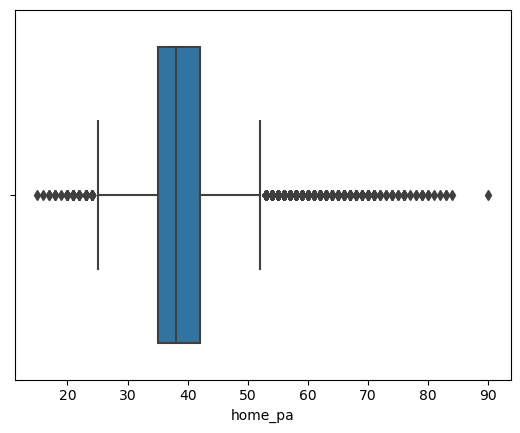

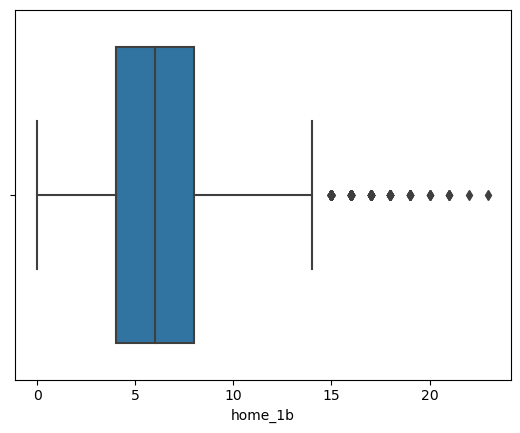

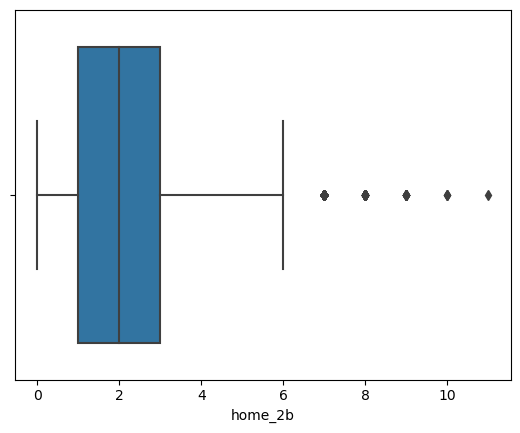

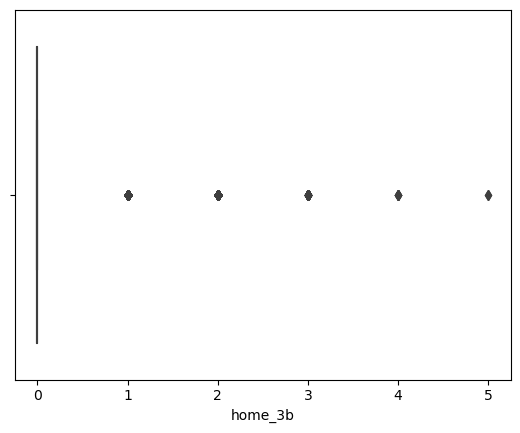

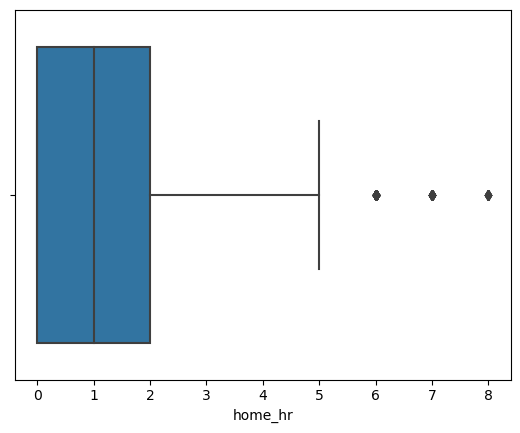

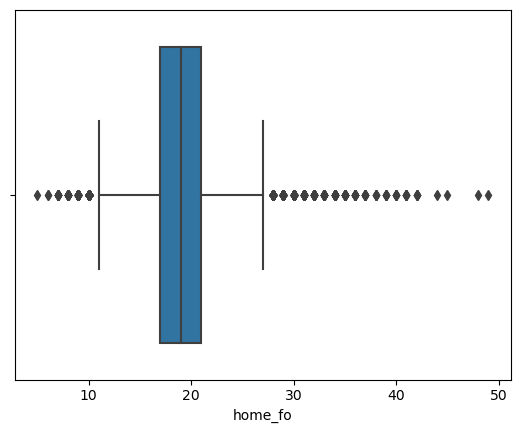

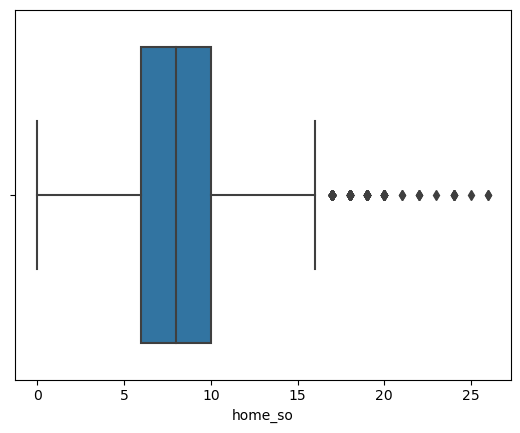

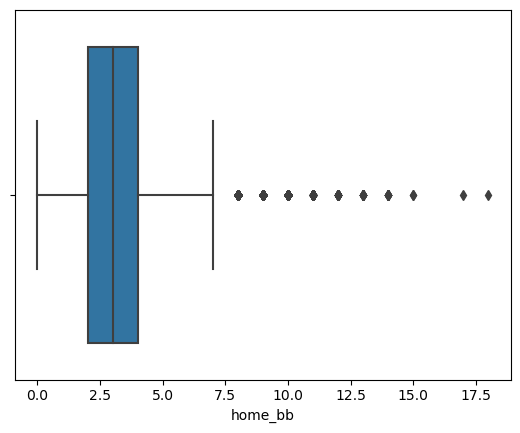

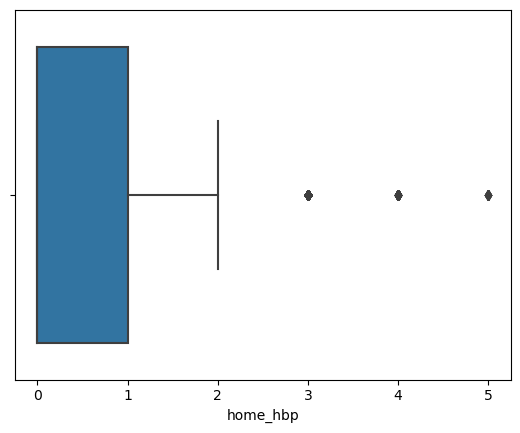

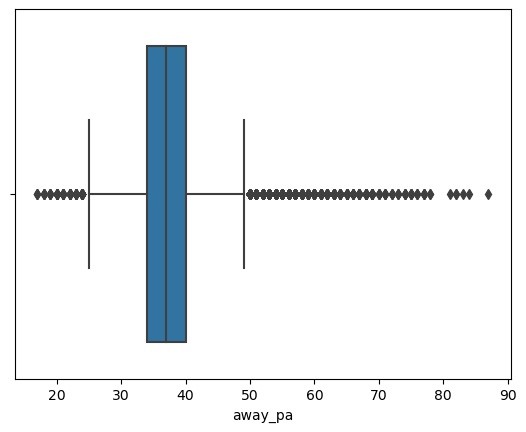

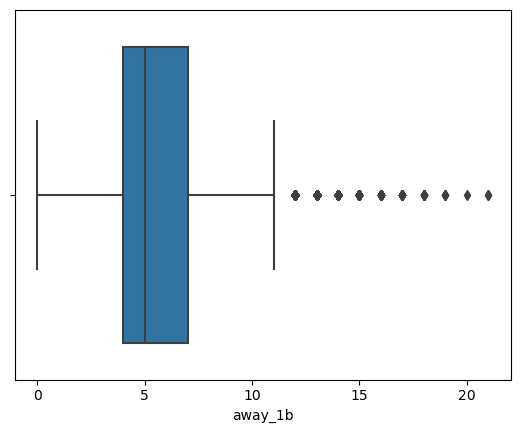

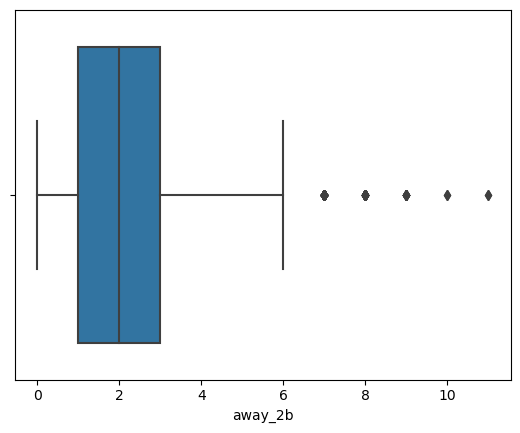

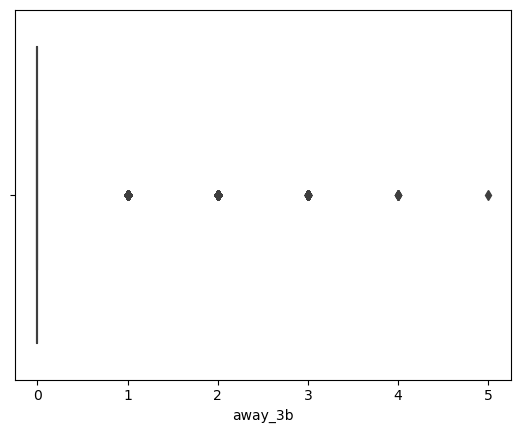

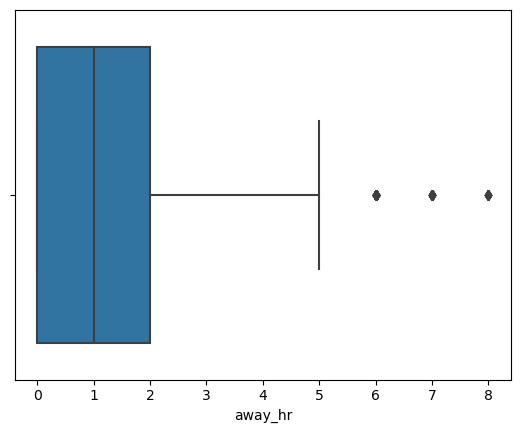

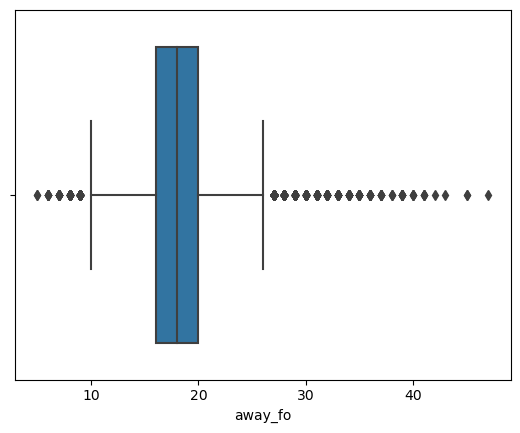

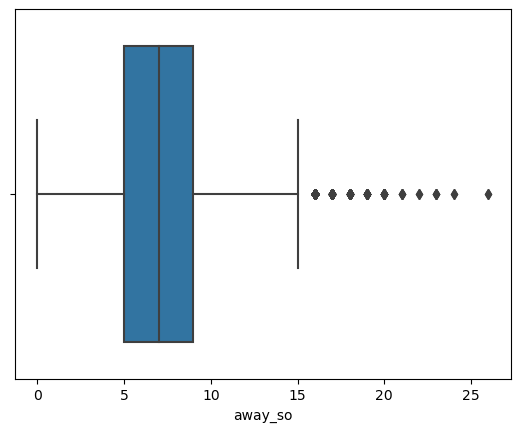

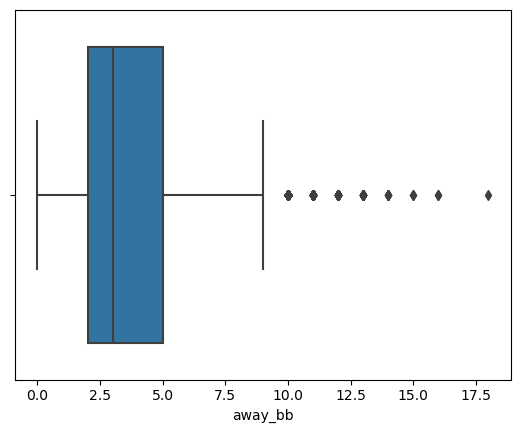

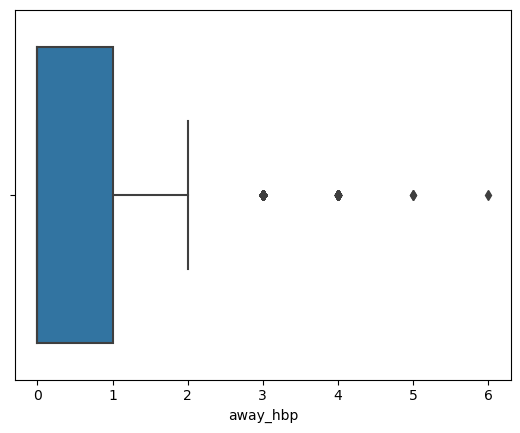

In [61]:
for i in numeric.columns:
    sns.boxplot(x=numeric[i], )
    plt.show()

In [62]:
# profile = ProfileReport(astro_df, title="Exploratory Data Analysis")

In [63]:
# profile.to_notebook_iframe()

In [64]:
astro_df

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0
1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,48,3,2,0,1,28,5,8,1,44,5,0,0,0,24,9,6,0
2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1
3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,OH,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0
4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,20231001,CHA,SDN,True,1,2,CHI12,Guaranteed Rate Field;U.S. Cellular Field,Chicago,IL,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1
56771,20231001,DET,CLE,True,5,2,DET05,Comerica Park,Detroit,MI,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0
56772,20231001,KCA,NYA,True,5,2,KAN06,Kauffman Stadium,Kansas City,MO,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0
56773,20231001,SEA,TEX,True,1,0,SEA03,Safeco Field,Seattle,WA,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1


In [65]:
# Drop unnecessary rows
astro_df[astro_df['state']=='JAP']

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0
1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,48,3,2,0,1,28,5,8,1,44,5,0,0,0,24,9,6,0
9714,20040330,TBA,NYA,False,8,3,TOK01,Tokyo Dome,Tokyo,JAP,37,1,4,1,1,21,6,3,0,41,9,4,0,2,20,3,3,0
9715,20040331,TBA,NYA,False,1,12,TOK01,Tokyo Dome,Tokyo,JAP,45,7,0,0,4,20,4,8,2,32,5,1,0,0,19,7,0,0
19433,20080325,OAK,BOS,False,5,6,TOK01,Tokyo Dome,Tokyo,JAP,42,7,3,0,1,21,7,3,0,44,4,1,0,2,19,10,7,1
19434,20080326,OAK,BOS,False,5,1,TOK01,Tokyo Dome,Tokyo,JAP,34,3,1,0,1,13,13,3,0,37,5,3,0,1,17,7,4,0
29150,20120328,OAK,SEA,False,1,3,TOK01,Tokyo Dome,Tokyo,JAP,40,7,1,0,1,27,4,0,0,41,3,3,0,0,23,10,0,2
29151,20120329,OAK,SEA,False,4,1,TOK01,Tokyo Dome,Tokyo,JAP,31,2,0,0,1,20,7,1,0,32,3,1,0,3,18,5,2,0
46159,20190320,OAK,SEA,False,7,9,TOK01,Tokyo Dome,Tokyo,JAP,41,4,1,0,2,16,10,6,2,38,3,3,0,3,18,8,3,0
46160,20190321,OAK,SEA,False,4,5,TOK01,Tokyo Dome,Tokyo,JAP,51,3,4,0,2,26,9,5,2,52,9,1,0,0,26,10,6,0


In [66]:
# Drop unnecessary columns
columns_to_drop = ['game_date', 'venue', 'venue_name', 'state', 'city']

astro_df.drop(columns_to_drop, axis=1, inplace=True)

In [67]:
astro_df

,home_team,away_team,is_day_game,home_score,away_score,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp
0,NYN,CHN,False,3,5,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0
1,CHN,NYN,False,1,5,48,3,2,0,1,28,5,8,1,44,5,0,0,0,24,9,6,0
2,ATL,COL,True,2,0,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1
3,CIN,MIL,True,3,3,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0
4,FLO,SFN,False,6,4,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,CHA,SDN,True,1,2,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1
56771,DET,CLE,True,5,2,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0
56772,KCA,NYA,True,5,2,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0
56773,SEA,TEX,True,1,0,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1


### Stack Home and Away Teams


In [68]:
home_cols = ['home_team', 'home_score', 'home_pa', 'home_1b', 
             'home_2b', 'home_3b', 'home_hr', 'home_fo', 'home_so',
            'home_bb', 'home_hbp', 'is_day_game']

away_cols = ['away_team', 'away_score', 'away_pa', 'away_1b', 
             'away_2b', 'away_3b', 'away_hr', 'away_fo', 'away_so',
            'away_bb', 'away_hbp', 'is_day_game']

In [69]:
home_df = astro_df[home_cols]
away_df = astro_df[away_cols]

In [70]:
# Add away team identifier
home_df.insert(0, 'is_away', 0)

In [71]:
home_df

,is_away,home_team,home_score,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,is_day_game
0,0,NYN,3,45,9,1,0,2,17,5,10,1,False
1,0,CHN,1,48,3,2,0,1,28,5,8,1,False
2,0,ATL,2,34,4,2,0,0,19,7,2,0,True
3,0,CIN,3,27,6,1,0,0,14,1,5,0,True
4,0,FLO,6,36,5,2,2,1,17,8,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,0,CHA,1,44,6,1,0,0,22,8,7,0,True
56771,0,DET,5,34,3,1,0,1,20,8,1,0,True
56772,0,KCA,5,35,4,3,0,0,18,7,3,0,True
56773,0,SEA,1,30,3,1,0,0,15,11,0,0,True


In [72]:
away_df.insert(0, 'is_away', 1)

In [73]:
away_df

,is_away,away_team,away_score,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,is_day_game
0,1,CHN,5,38,5,1,0,1,24,4,3,0,False
1,1,NYN,5,44,5,0,0,0,24,9,6,0,False
2,1,COL,0,32,5,0,0,2,17,6,1,1,True
3,1,MIL,3,20,3,1,0,1,10,4,1,0,True
4,1,SFN,4,38,9,3,0,0,17,7,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,1,SDN,2,44,7,0,0,0,17,16,3,1,True
56771,1,CLE,2,38,4,4,0,1,16,7,6,0,True
56772,1,NYA,2,35,7,0,1,3,15,8,1,0,True
56773,1,TEX,0,30,4,0,0,0,14,10,1,1,True


In [74]:
home_df = home_df.rename(columns={'home_team':'team', 'home_score':'score', 'home_pa':'pa', 'home_1b':'singles',
                       'home_2b': 'doubles', 'home_3b': 'triples', 'home_hr':'homeruns', 'home_fo':'field_outs',
                       'home_so':'strikeouts', 'home_bb':'num_walks', 'home_hbp':'hit_by_pitches'})

In [75]:
away_df = away_df.rename(columns={'away_team':'team', 'away_score':'score', 'away_pa':'pa', 'away_1b':'singles',
                       'away_2b': 'doubles', 'away_3b': 'triples', 'away_hr':'homeruns', 'away_fo':'field_outs',
                       'away_so':'strikeouts', 'away_bb':'num_walks', 'away_hbp':'hit_by_pitches'})

In [76]:
away_df

,is_away,team,score,pa,singles,doubles,triples,homeruns,field_outs,strikeouts,num_walks,hit_by_pitches,is_day_game
0,1,CHN,5,38,5,1,0,1,24,4,3,0,False
1,1,NYN,5,44,5,0,0,0,24,9,6,0,False
2,1,COL,0,32,5,0,0,2,17,6,1,1,True
3,1,MIL,3,20,3,1,0,1,10,4,1,0,True
4,1,SFN,4,38,9,3,0,0,17,7,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,1,SDN,2,44,7,0,0,0,17,16,3,1,True
56771,1,CLE,2,38,4,4,0,1,16,7,6,0,True
56772,1,NYA,2,35,7,0,1,3,15,8,1,0,True
56773,1,TEX,0,30,4,0,0,0,14,10,1,1,True


In [77]:
stacked_df = pd.concat([home_df, away_df], ignore_index=True)

In [ ]:
stacked_df

In [ ]:
# Replace T/F variables
stacked_df['is_day_game'] = stacked_df['is_day_game'].replace({False:0, True:1})


In [ ]:
obp = [row["singles"] + row["doubles"] + row["triples"] + row["homeruns"] + row["num_walks"] + row["hit_by_pitches"] / (row["pa"]) for index, row in stacked_df.iterrows()]

In [ ]:
stacked_df['obp'] = obp

In [ ]:
stacked_df

In [ ]:
# one-hot encode categorical variables
# stacked_df = pd.get_dummies(stacked_df)

In [ ]:
stacked_df.drop(columns=['team'], inplace=True, axis=1)

In [ ]:
# create feature matrix and target values
X = stacked_df.drop(columns=['score'])
X

In [ ]:
y = stacked_df['score']
y

In [78]:
# Create train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Baseline Models

In [80]:
# Scale numeric X_train values
scaler = StandardScaler()
lr = LinearRegression()

# pipeline
pipeline = Pipeline([('scaler', scaler),('lr', lr)])

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [81]:
# predict
y_preds = pipeline.predict(X_test)

In [82]:
# Evaluate model
mean_squared_error(y_test, y_preds, squared=False)

3.107108926731768

In [83]:
# Lasso Model
lasso = Lasso()

pipeline2 = Pipeline([
    ('scaler', scaler),
    ('lasso', lasso)
])

pipeline2.fit(X_train, y_train)

y_preds_lasso = pipeline2.predict(X_test)

In [84]:
mean_squared_error(y_test, y_preds_lasso, squared=False)

3.1645762334074328

In [85]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

In [86]:
mean_squared_error(y_test, rf_preds, squared=False)

3.1005158591327517

In [87]:
X_train.columns.to_list()

['is_away',
 'pa',
 'singles',
 'doubles',
 'triples',
 'homeruns',
 'field_outs',
 'strikeouts',
 'num_walks',
 'hit_by_pitches',
 'is_day_game',
 'obp']

In [88]:
feature_importances = rf.feature_importances_

feature_names = X_train.columns.to_list()
feature_importances_dict = dict(zip(feature_names, feature_importances))

# Display or print feature importances
for feature, importance in feature_importances_dict.items():
    print(f"{feature}: {importance}")

is_away: 0.019055664974435452
pa: 0.1086487156351594
singles: 0.11423518940380517
doubles: 0.0917852345730213
triples: 0.03193035586550663
homeruns: 0.06558608602521598
field_outs: 0.12168624992019181
strikeouts: 0.12201266035510787
num_walks: 0.09570023398668456
hit_by_pitches: 0.03423202702761437
is_day_game: 0.04389977785436544
obp: 0.15122780437889213


In [89]:
stacked_df.score.unique()

array([ 3,  1,  2,  6,  4,  7,  0, 10,  5, 12, 11,  9,  8, 13, 14, 18, 15,
       16, 17, 19, 23, 20, 22, 25, 21, 29, 26, 30, 24, 28])